# Welcom to this simple introduction to Tensorflow

## 1. Install tensorflow
It is simple to run:

**```sudo pip install tensorflow```**

If you have a GPU card, you can install gpu version. But you should install cuda and cudnn library firstly.

**```sudo pip install tensorflow-gpu```**

GPU version is recommended.

## 2. Basic Concept

In [19]:
import tensorflow as tf
import numpy as np

In [69]:
%matplotlib notebook

In [14]:
g = tf.Graph()

with g.as_default():
    a = tf.placeholder(tf.float32, name="a")
    b = tf.placeholder(tf.float32, name="b")
    c = tf.add(a, b)
    d = tf.placeholder(tf.float32, name="d")
    x = tf.multiply(c, d, name="x")

# Write graph definition to logdir, then tensorboard can read it and draw itin browser.
tf.summary.FileWriter("../logs/basic_add", g).close()

### Display graph
Change workding directory to project root, and execute:  
**```tensorboard --logdir=../logs/basic_add```**

Then open a URL **```http://127.0.0.1:6006```** in your browser, you will get graph picture like this:
![](../logs/images/graph_1.png)


### Run graph

We will get:

**```x = (10+20)*5 = 150```**

In [18]:
# intialize session with the graph we just defined.
with tf.Session(graph=g) as sess:
    # run to get x's value
    x_value = sess.run(x, feed_dict={a:10, b:20, d:5})
    print("Result of x: %f" % x_value)

Result of x: 150.000000


## 3. Toy model to train - Least Squares for linear model

In [95]:
import numpy as np
import sklearn.linear_model
from sklearn.datasets import make_regression

In [21]:
np.random.seed(12345)

In [182]:
K = 100000      # number of points
D = 2          # number of features
X = np.random.rand(K, 2) * 100.0
W = np.array([1.5, 2.0])
b = 10
noise = np.random.randn(K) * 30   # observe noise

y = np.dot(X, W) + b     
y = y + noise                    # add noise

In [183]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(X, y)
reg.coef_, reg.intercept_

(array([ 1.49780926,  1.99271649]), 10.483181771761167)

<IPython.core.display.Javascript object>


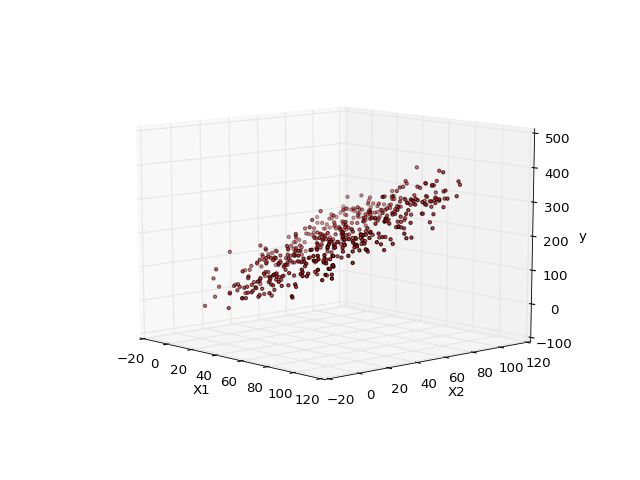

In [193]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

idx = np.arange(X.shape[0], step=200)
ax.scatter(X[idx,0], X[idx,1], y[idx], c='r', s=8, marker='o')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

In [194]:
K = 200000      # number of points
D = 2          # number of features
X = np.random.rand(K, 1) * 100.0
W = np.array([1.5, 2.0])
b = 10.0
noise = (np.random.rand(K) - 0.5) * 20  # observe noise

y = np.dot(X, W) + b     
y = y + noise   

reg = sklearn.linear_model.LinearRegression()
reg.fit(X, y)
reg.coef_, reg.intercept_

ValueError: shapes (200000,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

<IPython.core.display.Javascript object>


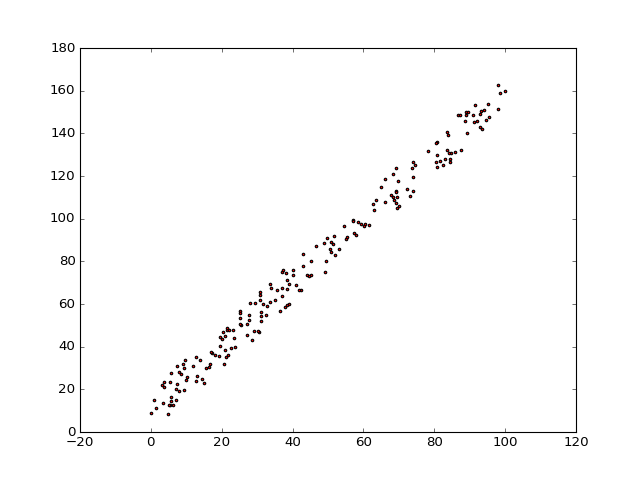

In [166]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c='r', marker='.')
plt.show()

In [180]:
? np.arange